# Optimizing Supplier Lead Times and Inventory Management
## Project Overview
In this project, we analyze a mock supply chain dataset to identify areas for improvement, focusing on supplier lead times and inventory levels. We aim to provide actionable insights for optimizing supply chain performance, reducing lead times, and preventing stockouts.

### Tools Used:
- Python (pandas, numpy)
- Data visualization with matplotlib

## Step 1: Data Creation and Loading

We first generate a sample dataset that contains supplier information, lead times, inventory levels, reorder points, and delivery times. The dataset is loaded into a pandas DataFrame for analysis.

### Data Columns:
- **Supplier**: The supplier name.
- **Lead Time (Days)**: The time it takes for the supplier to deliver goods (in days).
- **Inventory Level**: The current stock levels for each supplier.
- **Reorder Point**: The minimum inventory level before reordering stock.
- **Delivery Time (Days)**: Time taken for the supplier to complete delivery after order.

In [ ]:
import pandas as pd

# Create a dictionary to store the data
data_dict = {
    'Supplier': ['Supplier A', 'Supplier B', 'Supplier C', 'Supplier D', 'Supplier E'],
    'Lead Time (Days)': [10, 15, 8, 12, 20],
    'Inventory Level': [500, 800, 600, 400, 300],
    'Reorder Point': [300, 500, 400, 250, 200],
    'Delivery Time (Days)': [12, 18, 10, 14, 22]
}

# Create a DataFrame from the dictionary
data = pd.DataFrame(data_dict)

# Display the first few rows of the data
data.head()

,Supplier,Lead Time (Days),Inventory Level,Reorder Point,Delivery Time (Days)
0,Supplier A,10,500,300,12
1,Supplier B,15,800,500,18
2,Supplier C,8,600,400,10
3,Supplier D,12,400,250,14
4,Supplier E,20,300,200,22


## Step 2: Data Cleaning

Before performing any analysis, we check for missing values and verify the data types. If necessary, we convert data types to ensure consistency and accuracy during the analysis process.

In [ ]:
# Check for missing values
print(data.isnull().sum())

Supplier                0
Lead Time (Days)        0
Inventory Level         0
Reorder Point           0
Delivery Time (Days)    0
dtype: int64


In [ ]:
# Check data types
print(data.dtypes)

Supplier                object
Lead Time (Days)         int64
Inventory Level          int64
Reorder Point            int64
Delivery Time (Days)     int64
dtype: object


In [ ]:
# Example of converting columns to integer type (if necessary)
data['Lead Time (Days)'] = data['Lead Time (Days)'].astype(int)
data['Inventory Level'] = data['Inventory Level'].astype(int)

## Step 3: Data Analysis

### Identifying Suppliers with Long Lead Times

We filter suppliers with lead times greater than 10 days to determine which suppliers may require further analysis or negotiation to improve supply chain efficiency.

In [ ]:
# Suppliers with lead times greater than 10 days
long_lead_time_suppliers = data[data['Lead Time (Days)'] > 10]
print(long_lead_time_suppliers)

     Supplier  Lead Time (Days)  Inventory Level  Reorder Point  \
1  Supplier B                15              800            500   
3  Supplier D                12              400            250   
4  Supplier E                20              300            200   

   Delivery Time (Days)  
1                    18  
3                    14  
4                    22  


### Identifying Products Near Reorder Point

We also check which products are at or below their reorder point to ensure that stockouts are avoided. A reorder alert is triggered for any product below the defined reorder threshold.

In [ ]:
# Create a column to flag products near reorder points
data['Reorder Alert'] = data['Inventory Level'] <= data['Reorder Point']

# Display rows where reorder alert is triggered
reorder_alerts = data[data['Reorder Alert'] == True]
print(reorder_alerts)

Empty DataFrame
Columns: [Supplier, Lead Time (Days), Inventory Level, Reorder Point, Delivery Time (Days), Reorder Alert]
Index: []


## Step 4: Data Visualization

### Supplier Lead Times

The bar chart below shows the lead times for each supplier. This visualization helps us quickly identify suppliers with longer lead times, who may need closer management or process improvements.

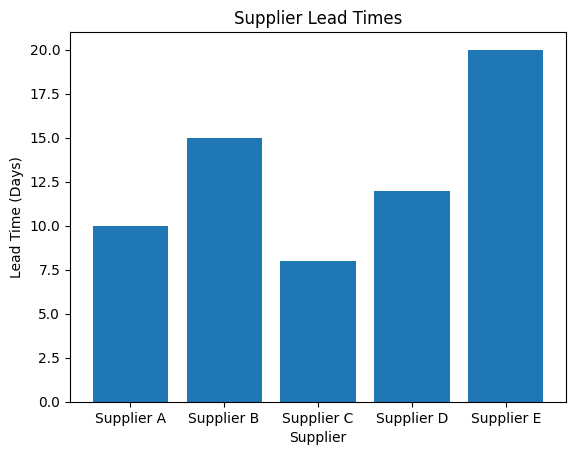

In [ ]:

# Bar chart for supplier lead times
plt.bar(data['Supplier'], data['Lead Time (Days)'])
plt.xlabel('Supplier')
plt.ylabel('Lead Time (Days)')
plt.title('Supplier Lead Times')
plt.show()

### Inventory Levels vs Reorder Points

In this chart, we visualize the current inventory levels of each supplier compared to their reorder points. Any supplier whose inventory is at or below the reorder point requires immediate attention to prevent stockouts.

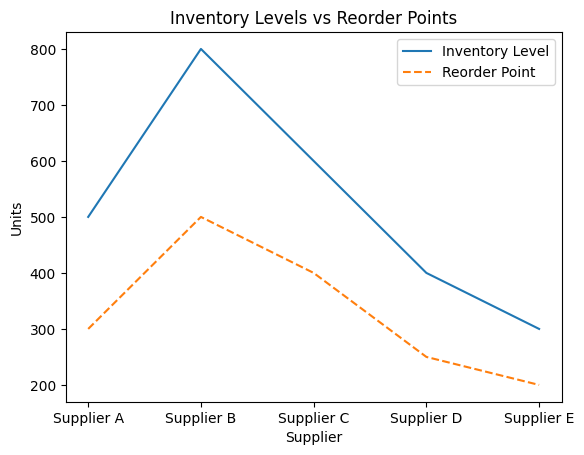

In [ ]:
# Line chart for inventory levels and reorder points
plt.plot(data['Supplier'], data['Inventory Level'], label='Inventory Level')
plt.plot(data['Supplier'], data['Reorder Point'], label='Reorder Point', linestyle='--')
plt.xlabel('Supplier')
plt.ylabel('Units')
plt.title('Inventory Levels vs Reorder Points')
plt.legend()
plt.show()

## Conclusion

By analyzing supplier lead times and monitoring inventory levels against reorder points, we’ve identified key areas for improvement in the supply chain:

- **Supplier B and Supplier E** have significantly higher lead times, indicating potential delays that need to be addressed.
- **Products from Supplier D** are nearing their reorder point, requiring immediate restocking to avoid stockouts.

Further analysis could involve optimizing reorder quantities and forecasting future demand based on historical data trends.